# Evaluated project 7

# Customer Churn Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read csv file and convert into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [3]:
# number of rows and column
df.shape

(7043, 21)

In [5]:
# this dataset has 7043 rows and 21 columns

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# We have float, integer and object data in dataset. we should do encoding for object data

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# Null value check

<AxesSubplot:>

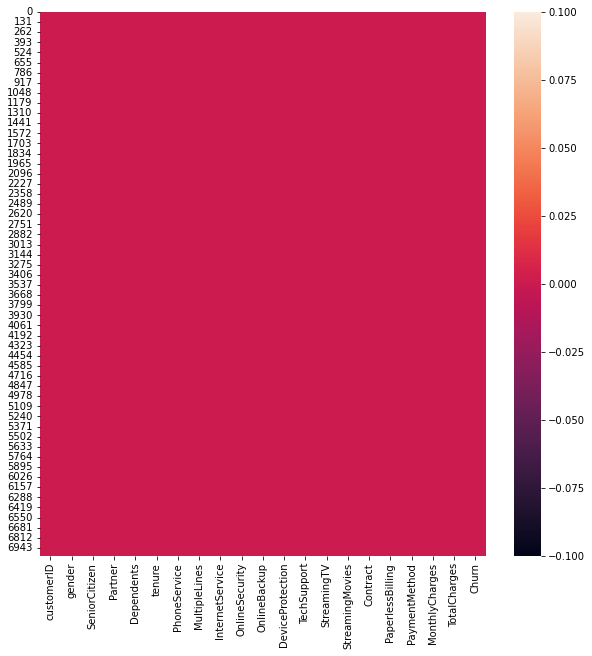

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# There are No Null Values

# univariate analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

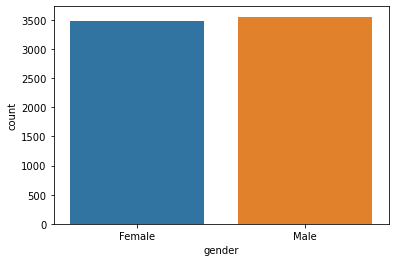

In [14]:
sns.countplot(df[ 'gender'])

In [15]:
# Female and Male have equal amount of data

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

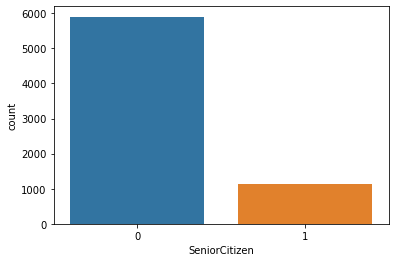

In [16]:
sns.countplot(df['SeniorCitizen'])

In [17]:
# Senior Citzen users are very low

<AxesSubplot:xlabel='Partner', ylabel='count'>

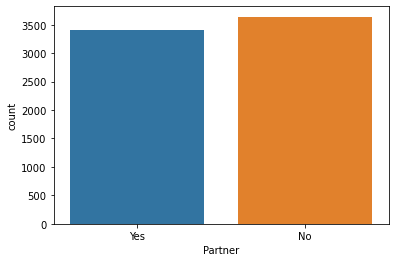

In [18]:
sns.countplot(df[ 'Partner'])

In [19]:
# Almost equal no of people have and dont have partners

<AxesSubplot:xlabel='Dependents', ylabel='count'>

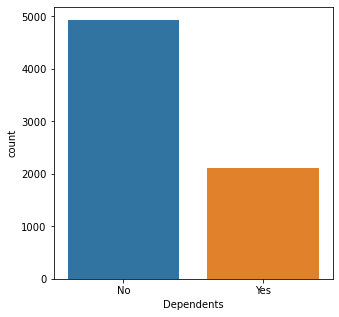

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(df['Dependents'])

In [22]:
# No dependents data is more

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

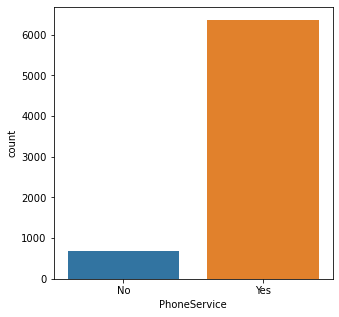

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(df['PhoneService'])

In [24]:
# Phone Servcie yes data is more compared to no

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

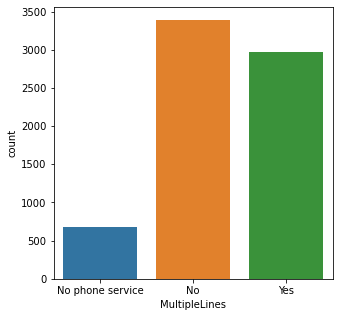

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(df['MultipleLines'])

In [26]:
# Multiples lines no data is higher

<AxesSubplot:xlabel='InternetService', ylabel='count'>

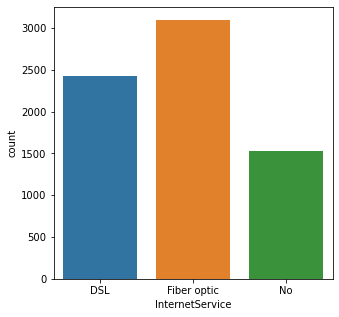

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(df['InternetService'])

In [28]:
# Fiber optic service is high as its latest technology

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

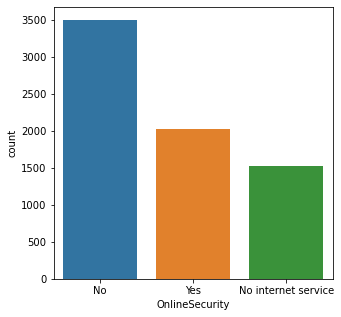

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(df[ 'OnlineSecurity'])

In [30]:
# OnlineSecurity is not offered mostly

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

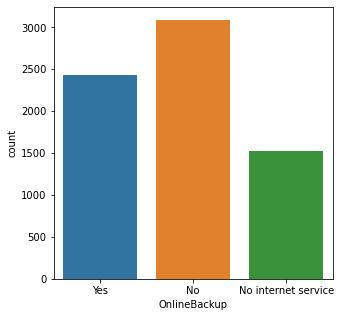

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(df[ 'OnlineBackup'])

In [32]:
# No online backup is provided by most

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

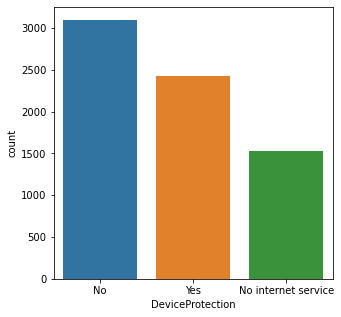

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(df[ 'DeviceProtection'])

In [34]:
# Device protection is not offered by most

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

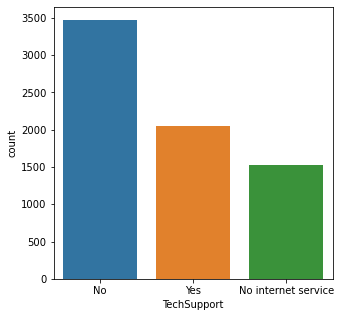

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(df['TechSupport'])

In [36]:
# Tech support is not provided by most

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

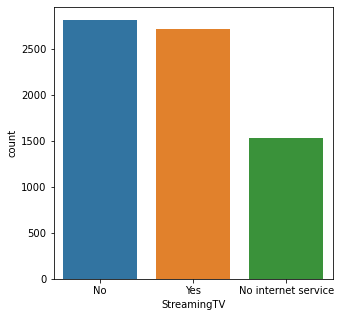

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(df['StreamingTV'])

In [38]:
# Streaming TV is offered and not offered equally by all

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

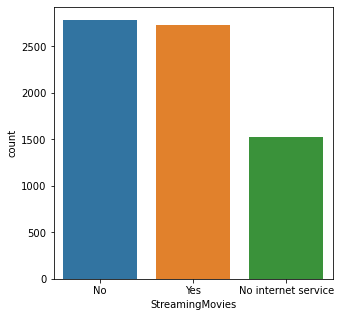

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(df[ 'StreamingMovies'])

<AxesSubplot:xlabel='Contract', ylabel='count'>

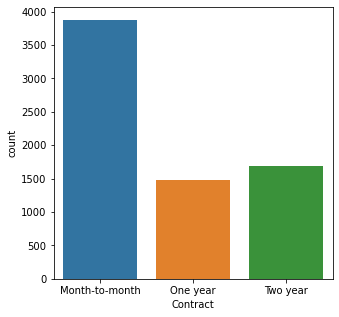

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(df['Contract'])

In [41]:
#Month to month contract data is higher

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

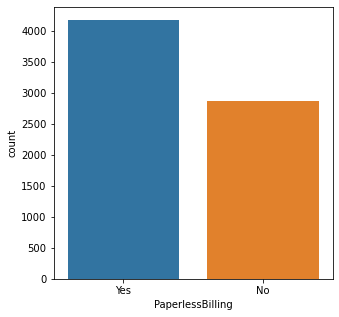

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(df['PaperlessBilling'])

In [43]:
# most of paperless billing is given by operators

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

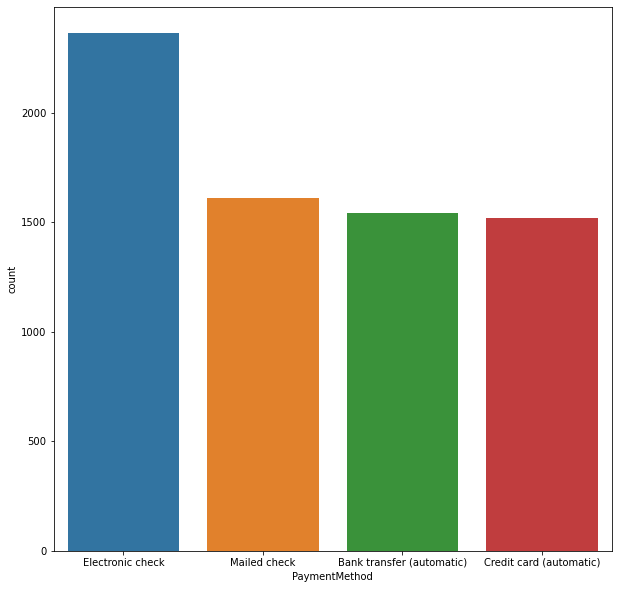

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(df['PaymentMethod'])

In [45]:
#Electronic check is mostly preferred

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

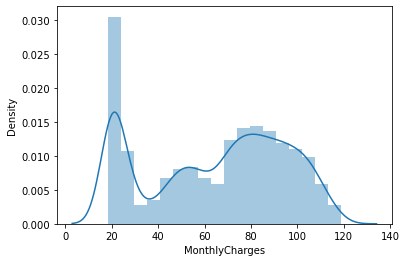

In [47]:
sns.distplot(df['MonthlyCharges'])

# Bivariate Analysis

<AxesSubplot:xlabel='gender', ylabel='Churn'>

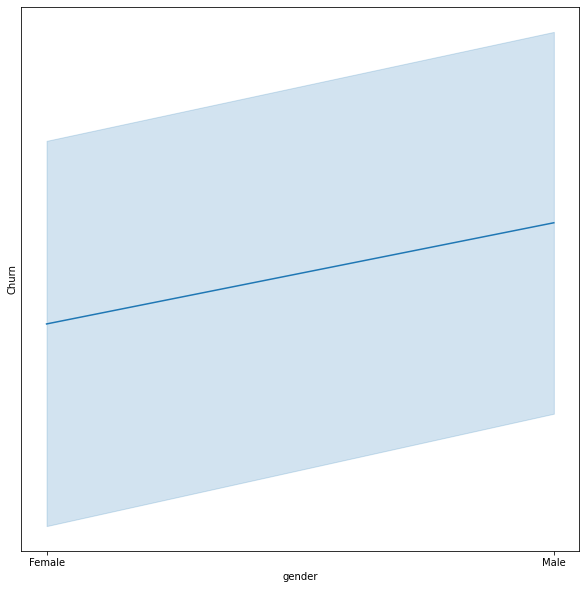

In [48]:
plt.figure(figsize=(10,10))
sns.lineplot(df['gender'],df['Churn'])

In [49]:
# Male data has higher churn

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

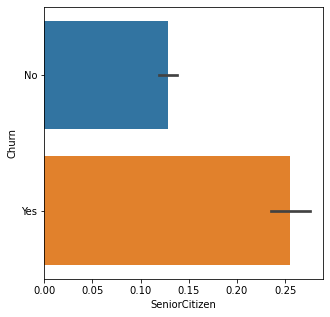

In [50]:
plt.figure(figsize=(5,5))
sns.barplot(df['SeniorCitizen'],df['Churn'])

In [51]:
# Senior citlizen has higher churn

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

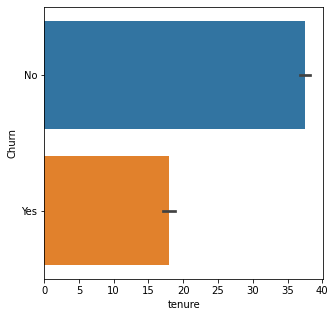

In [52]:
plt.figure(figsize=(5,5))
sns.barplot(df['tenure'],df['Churn'])

In [53]:
# If tenure is high churn is less but if tenure is low churn is higher

<AxesSubplot:xlabel='MultipleLines', ylabel='MonthlyCharges'>

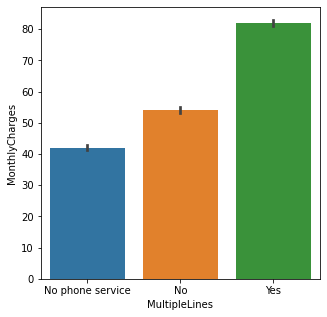

In [54]:
plt.figure(figsize=(5,5))
sns.barplot(df['MultipleLines'],df['MonthlyCharges'])

In [55]:
# Monthly Charges is higher for mulitple lines

<AxesSubplot:xlabel='Churn', ylabel='Contract'>

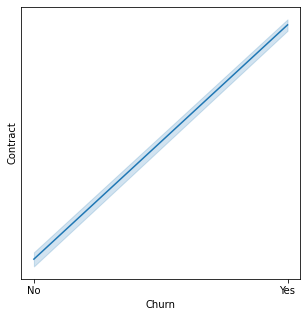

In [57]:
plt.figure(figsize=(5,5))
sns.lineplot(df['Churn'],df['Contract'])

In [58]:
# Churn and contract are positively correlated

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

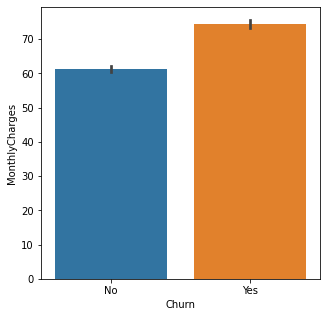

In [4]:
plt.figure(figsize=(5,5))
sns.barplot(df['Churn'],df[ 'MonthlyCharges'])

In [5]:
# Churn is higher for higher monthly charges

<AxesSubplot:xlabel='Churn', ylabel='OnlineSecurity'>

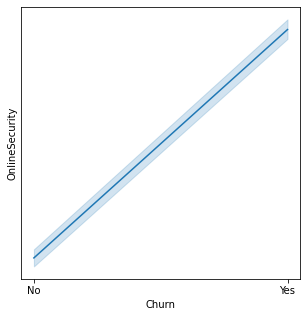

In [8]:
plt.figure(figsize=(5,5))
sns.lineplot(df['Churn'],df['OnlineSecurity'])

In [7]:
# Churn and online security are Positively correlated

<AxesSubplot:xlabel='Churn', ylabel='OnlineBackup'>

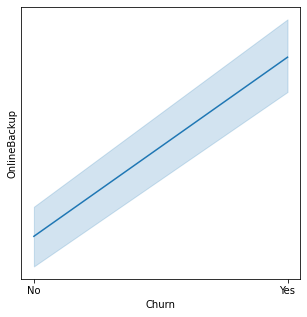

In [9]:
plt.figure(figsize=(5,5))
sns.lineplot(df['Churn'],df['OnlineBackup'])

In [10]:
# Churn and Online backup are positively correlated

<AxesSubplot:xlabel='Churn', ylabel='DeviceProtection'>

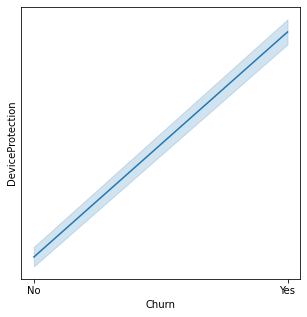

In [11]:
plt.figure(figsize=(5,5))
sns.lineplot(df['Churn'],df['DeviceProtection'])

In [12]:
#Churn and Deivce protection are positvely correlated

<AxesSubplot:xlabel='Churn', ylabel='StreamingTV'>

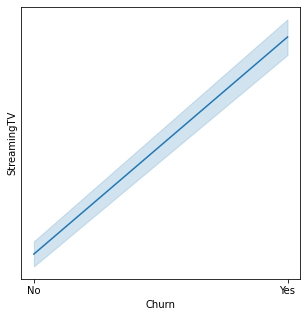

In [13]:
plt.figure(figsize=(5,5))
sns.lineplot(df['Churn'],df['StreamingTV'])

In [14]:
#Churn and Streaming Tv are positively correlated

<AxesSubplot:xlabel='Churn', ylabel='StreamingMovies'>

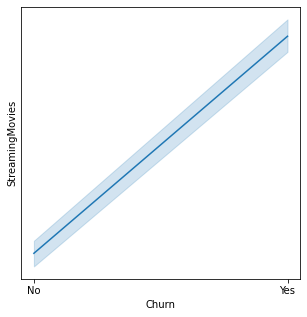

In [15]:
plt.figure(figsize=(5,5))
sns.lineplot(df['Churn'],df[ 'StreamingMovies'])

In [16]:
# Churn and Streaming tv are posively correlated

<AxesSubplot:xlabel='Churn', ylabel='PaymentMethod'>

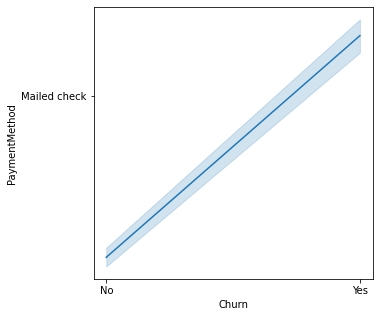

In [17]:
plt.figure(figsize=(5,5))
sns.lineplot(df['Churn'],df['PaymentMethod'])

In [18]:
# churn and payment moethod are positively correlated

<AxesSubplot:xlabel='Churn', ylabel='PaperlessBilling'>

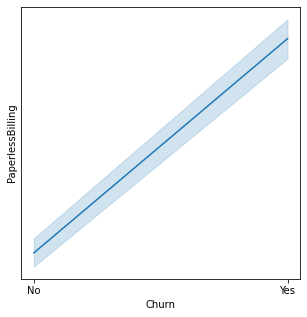

In [19]:
plt.figure(figsize=(5,5))
sns.lineplot(df['Churn'],df['PaperlessBilling'])

In [20]:
# Churn and Paperless billing are positively correlated

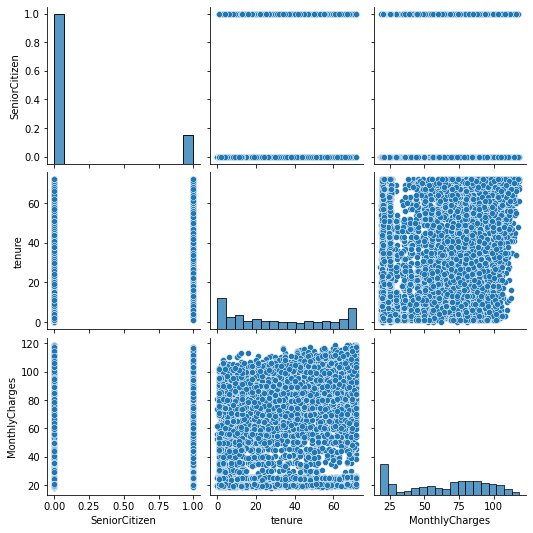

In [21]:
sns.pairplot(df)

# Encoding

In [22]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors='coerce')

In [24]:
df.drop("customerID",inplace=True,axis=1)

In [25]:
# Encode categorical data

In [27]:
ordinal = ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",'TechSupport','StreamingTV',"StreamingMovies",
           "Contract","PaperlessBilling","PaymentMethod"]

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [29]:
le = LabelEncoder()
oe = OrdinalEncoder()

for ordi in ordinal:
    df[ordi] = oe.fit_transform(df[ordi].values.reshape(-1,1))
    
df["Churn"] = le.fit_transform(df["Churn"].values.reshape(-1,1))

In [30]:
df.dtypes

gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [31]:
# object data is converted to numeric using encoding

In [33]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [35]:
# removing null values using simple inputer

from sklearn.impute import SimpleImputer

In [36]:
si = SimpleImputer(strategy='mean')
df["TotalCharges"] = si.fit_transform(df["TotalCharges"].values.reshape(-1,1))

In [37]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Correlation

<AxesSubplot:>

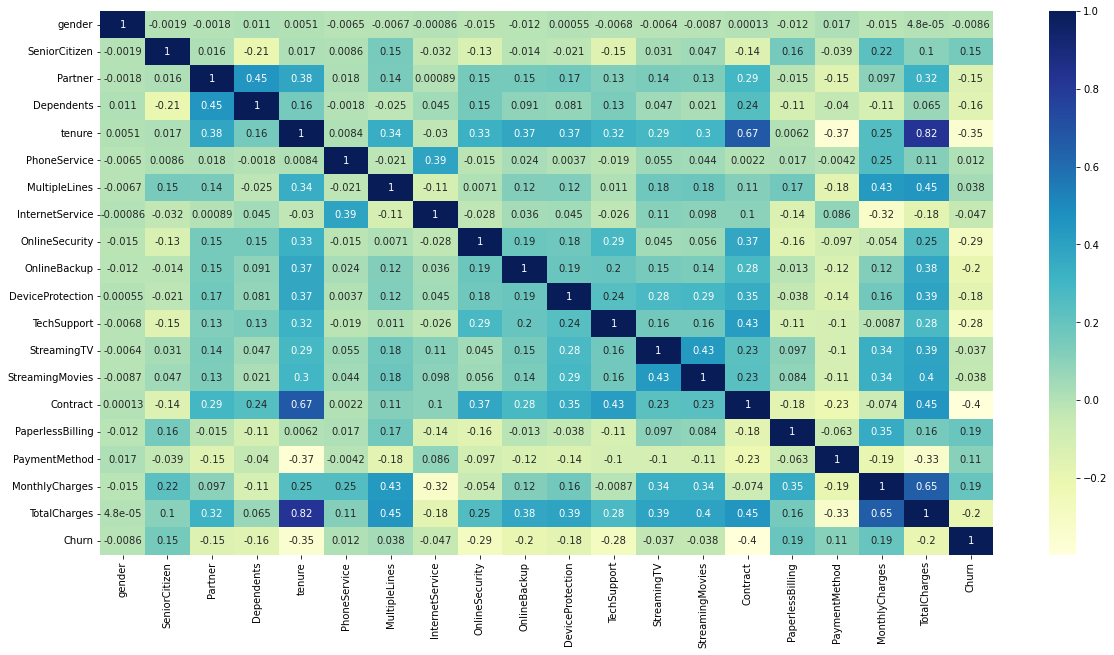

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [39]:
df.corr()["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

# Skewness

In [77]:
dc1 = df.drop(["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",'TechSupport','StreamingTV',"StreamingMovies",
           "Contract","PaperlessBilling","PaymentMethod","Churn"],axis=1)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='F

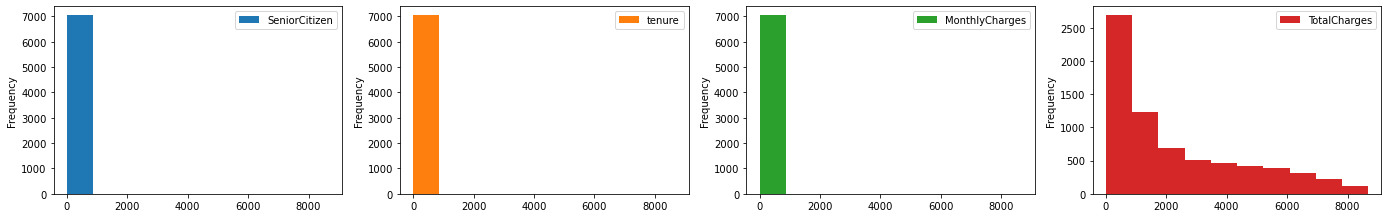

In [44]:
dc1.plot(kind="hist",subplots=True,layout=(5,5),figsize=(30,20))

In [45]:
dc1.skew().sort_values(ascending=False)

SeniorCitizen     1.833633
TotalCharges      0.962394
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

In [46]:
# remove skewness

# Using power_transform for skewness removal

In [47]:
from sklearn.preprocessing import power_transform
dc2 = power_transform(dc1)

In [48]:
dc2 = pd.DataFrame(dc2,columns=dc1.columns)

dc2.skew()

SeniorCitizen     1.833633
tenure           -0.243325
MonthlyCharges   -0.259035
TotalCharges     -0.144899
dtype: float64

In [49]:
# we have removed skewness

# Outlier removal

SeniorCitizen        AxesSubplot(0.125,0.125;0.168478x0.755)
tenure            AxesSubplot(0.327174,0.125;0.168478x0.755)
MonthlyCharges    AxesSubplot(0.529348,0.125;0.168478x0.755)
TotalCharges      AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

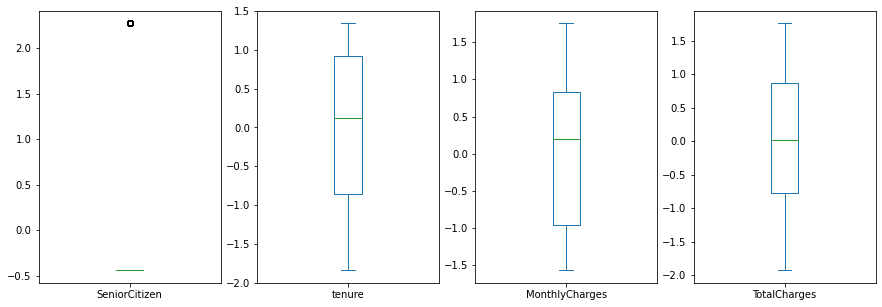

In [50]:
dc2.plot(kind="box",subplots=True,figsize=(15,5))

In [51]:
dc2.shape

(7043, 4)

In [52]:
from scipy.stats import zscore

z = np.abs(zscore(dc2))

In [53]:
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

In [54]:
df1 = dc2

In [55]:
df1.shape

(7043, 4)

In [56]:
# no outliers

In [57]:
cat=["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",'TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','StreamingMovies','Churn']
dfc = pd.DataFrame()
for i in cat:
    dfc[i] = df[i]
dfc.shape

(7043, 16)

# Balancing the data

In [58]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [59]:
dfb = df1.join(dfc)
dx = dfb.drop("Churn",axis=1)
dy = dfc.iloc[:,-1]

In [60]:
dft,y = sm.fit_resample(dx,dy)

<AxesSubplot:xlabel='Churn', ylabel='count'>

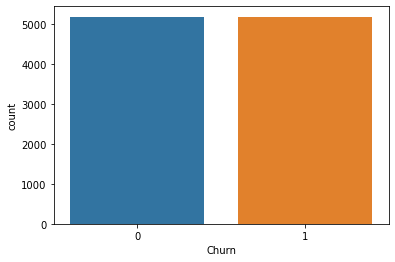

In [61]:
sns.countplot(y)

# Multicolinearity Checking

In [62]:
# variance inflation factor

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(19)]
vif["feature names"] = dft.columns

In [65]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
3,46.631612,TotalCharges
1,36.905152,tenure
7,10.384403,PhoneService
2,7.879205,MonthlyCharges
9,4.628530,InternetService
17,4.066617,PaymentMethod
15,3.533318,Contract
16,3.125672,PaperlessBilling
14,3.032709,StreamingTV
18,2.980391,StreamingMovies


In [66]:
dft.drop("TotalCharges",axis=1,inplace=True)

In [67]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(18)]
vif["feature names"] = dft.columns

In [68]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
6,10.355911,PhoneService
8,4.349412,InternetService
16,4.059014,PaymentMethod
14,3.291658,Contract
15,3.124707,PaperlessBilling
13,3.032208,StreamingTV
17,2.978833,StreamingMovies
4,2.661959,Partner
1,2.564913,tenure
7,2.507627,MultipleLines


In [69]:
# PhoneService has high vif index so dropping it

In [70]:
dft.drop("PhoneService",axis=1,inplace=True)

In [71]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(17)]
vif["feature names"] = dft.columns

In [72]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
15,3.683933,PaymentMethod
13,3.192570,Contract
12,3.022148,StreamingTV
16,2.974772,StreamingMovies
14,2.932098,PaperlessBilling
7,2.895045,InternetService
4,2.619975,Partner
6,2.494154,MultipleLines
1,2.355366,tenure
10,2.305198,DeviceProtection


In [73]:
# Multicolinearity Removed

# Standard Scaler

In [74]:
from sklearn.preprocessing import StandardScaler

In [78]:
dft1 = dft.drop(["gender","Partner","Dependents","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",'TechSupport','StreamingTV',"StreamingMovies",
           "Contract","PaperlessBilling","PaymentMethod"],axis=1)

In [79]:
sc = StandardScaler()
x = sc.fit_transform(dft1)
x_f= pd.DataFrame(x,columns=dft1.columns)

In [80]:
cat1 = ["gender","Partner","Dependents","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",'TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','StreamingMovies']
dfc1 = pd.DataFrame()
for i in cat1:
    dfc1[i] = dft[i]
dfc1.shape

(10348, 14)

In [81]:
x_final= x_f.join(dfc1)

In [82]:
x_final.shape

(10348, 17)

# Model Training

In [83]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# cross val score and accuracy score

In [84]:
algo = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),LogisticRegression()]
result = pd.DataFrame(columns=["Algorithm Name","Accuracy Score","Cross Validation Score"])

dtc=[]
knc=[]
rfc=[]
abc=[]
lr=[]
fl = [dtc,knc,rfc,abc,lr]

oo=0


for i in algo:
    acc=0
    rand=0
    
    for ii in range(20,80):
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=ii)
        cf = i
        cf.fit(train_x,train_y)
        pred = cf.predict(test_x)
        ac = accuracy_score(test_y,pred)
        if ac>acc:
            acc=ac
            rand=ii
    print(f' the best random state is {rand} and accuracy score is {acc} for algorithm {i}')
    
    
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=rand)
    cf = i
    cf.fit(train_x,train_y)
    pred = cf.predict(test_x)
    ac = accuracy_score(test_y,pred)
    cv = cross_val_score(cf,x_final,y,cv=5).mean()
    fl[oo].insert(0,i)
    fl[oo].insert(1,ac)
    fl[oo].insert(2,cv)
    result.loc[oo] = fl[oo]
    oo +=1
    
    
final_result = result.sort_values(by=["Accuracy Score","Cross Validation Score"],ascending=False)

 the best random state is 28 and accuracy score is 0.8106280193236715 for algorithm DecisionTreeClassifier()
 the best random state is 59 and accuracy score is 0.8072463768115942 for algorithm KNeighborsClassifier()
 the best random state is 24 and accuracy score is 0.870048309178744 for algorithm RandomForestClassifier()
 the best random state is 59 and accuracy score is 0.842512077294686 for algorithm AdaBoostClassifier()
 the best random state is 59 and accuracy score is 0.7893719806763285 for algorithm LogisticRegression()


In [85]:
final_result

,Algorithm Name,Accuracy Score,Cross Validation Score
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.869082,0.853026
3,"(DecisionTreeClassifier(max_depth=1, random_st...",0.842512,0.819876
1,KNeighborsClassifier(),0.807246,0.796774
0,DecisionTreeClassifier(),0.802415,0.785283
4,LogisticRegression(),0.789372,0.772131


# Support vector classifier

In [87]:
svc = SVC()
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=10)
svc.fit(train_x,train_y)
pred = svc.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(svc,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} for SVC' )

 the accuracy socre is 0.7855072463768116, the cross validation score is 0.7911703242949171 for SVC


In [88]:
# from all the classifier models random forest performed best with accuracy of 87 % and cross val score of 84%

# HyperParameter Tunining

In [89]:
from sklearn.model_selection import GridSearchCV

In [93]:
rf = RandomForestClassifier()
parameters = {'bootstrap': [True, False],
 'max_depth': [10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'n_estimators': [50,100]}
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=24)
gsv = GridSearchCV(rf,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100]})

In [94]:
gsv.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 50}

In [95]:
rf = RandomForestClassifier(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=2,n_estimators=100)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=24)
rf.fit(train_x,train_y)
pred = rf.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(rf,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} ' )

 the accuracy socre is 0.870048309178744, the cross validation score is 0.8513834543981431 


In [96]:
# The accuracy score is 87% and cross val score is 85%

In [97]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1040
           1       0.86      0.88      0.87      1030

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



In [98]:
print(confusion_matrix(test_y,pred))

[[892 148]
 [121 909]]


# ROC CURVE

In [99]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

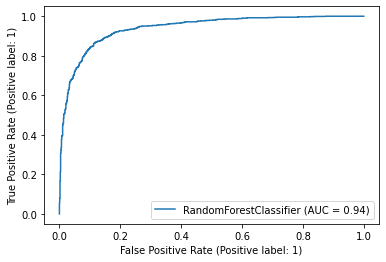

In [100]:
plot_roc_curve(rf,test_x,test_y)

In [101]:
print(f'The ROC_AUC_SCORE IS {roc_auc_score(test_y,pred)}')

The ROC_AUC_SCORE IS 0.870108289768484


# saving the model

In [103]:
import joblib
joblib.dump(rf,"CustomerChurn.pkl")

['CustomerChurn.pkl']